sumber https://colab.research.google.com/github/spatialaudio/digital-signal-processing-lecture/blob/master/filter_design/bilinear_transform.ipynb

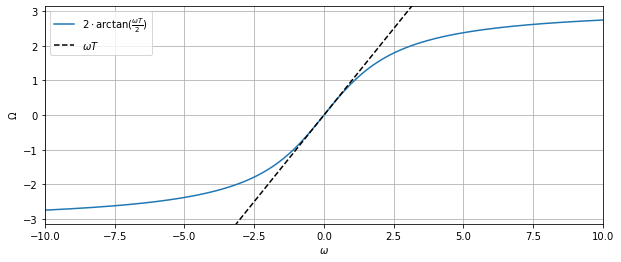

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

om = np.linspace(-10, 10, 200)
Om = 2 * np.arctan(om * 1 / 2)

plt.figure(figsize=(10, 4))
plt.plot(om, Om, label=r"$2 \cdot \arctan(\frac{\omega T}{2})$")
plt.plot(om, om, "k--", label=r"$\omega T$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\Omega$")
plt.axis([-10, 10, -np.pi, np.pi])
plt.legend(loc=2)
plt.grid()

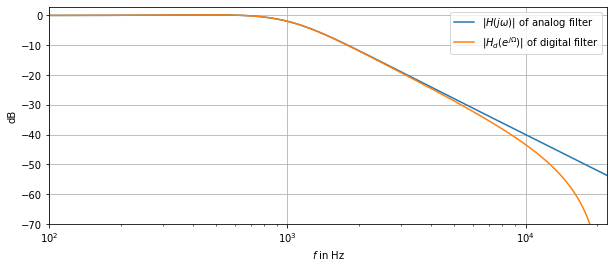

In [2]:
import scipy.signal as sig


fs = 44100  # sampling frequency
fc = 1000  # corner frequency of the lowpass

# coefficients of analog lowpass filter
Qinf = 0.8
sinf = 2 * np.pi * fc
C = 1e-6
L = 1 / (sinf**2 * C)
R = sinf * L / Qinf

B = [0, 0, 1]
A = [L * C, R * C, 1]

# cofficients of digital filter
T = 1 / fs
b = [T**2, 2 * T**2, T**2]
a = [
    (4 * L * C + 2 * T * R * C + T**2),
    (-8 * L * C + 2 * T**2),
    (4 * L * C - 2 * T * R * C + T**2),
]

# compute frequency responses
Om, Hd = sig.freqz(b, a, worN=1024)
tmp, H = sig.freqs(B, A, worN=fs * Om)

# plot results
f = Om * fs / (2 * np.pi)
plt.figure(figsize=(10, 4))
plt.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog filter")
plt.semilogx(
    f, 20 * np.log10(np.abs(Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter"
)
plt.xlabel(r"$f$ in Hz")
plt.ylabel(r"dB")
plt.axis([100, fs / 2, -70, 3])
plt.legend()
plt.grid()

In [ ]:
# filter low pass sederhana 1/(s+1)

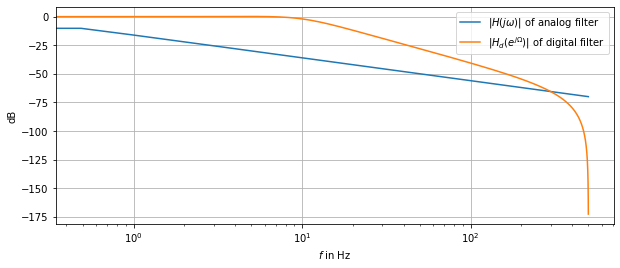

In [49]:
import scipy.signal as sig


fs = 1000  # sampling frequency
fc = 10  # corner frequency of the lowpass

# coefficients of analog lowpass filter
Qinf = 0.8
sinf = 2 * np.pi * fc
C = 1e-6
L = 1 / (sinf**2 * C)
R = sinf * L / Qinf

B = [0, 1]
A = [1, 1]

# cofficients of digital filter
T = 1 / fs
b = [T**2, 2 * T**2, T**2]
a = [
    (4 * L * C + 2 * T * R * C + T**2),
    (-8 * L * C + 2 * T**2),
    (4 * L * C - 2 * T * R * C + T**2),
]

# compute frequency responses
Om, Hd = sig.freqz(b, a, worN=1024)
tmp, H = sig.freqs(B, A, worN=fs * Om)

# plot results
f = Om * fs / (2 * np.pi)
plt.figure(figsize=(10, 4))
plt.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog filter")
plt.semilogx(
    f, 20 * np.log10(np.abs(Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter"
)
plt.xlabel(r"$f$ in Hz")
plt.ylabel(r"dB")
# plt.axis([100, fs / 2, -70, 3])
plt.legend()
plt.grid()

In [50]:
from scipy import signal
fs10= 10
fs100= 100
fs1000= 1000

fs10_z   = signal.bilinear(B,A,fs10)
fs100_z  = signal.bilinear(B,A,fs100)
fs1000_z = signal.bilinear(B,A,fs1000)

In [51]:
fs10_z

(array([0.04761905, 0.04761905]), array([ 1.       , -0.9047619]))

In [52]:
fs100_z

(array([0.00497512, 0.00497512]), array([ 1.        , -0.99004975]))

In [53]:
fs1000_z

(array([0.00049975, 0.00049975]), array([ 1.       , -0.9990005]))

In [55]:
fs10_a  =fs10_z[1]
fs10_b  =fs10_z[0]

fs100_a =fs100_z[1]
fs100_b =fs100_z[0]

fs1000_a=fs1000_z[1]
fs1000_b=fs1000_z[0]

perbandingan pengaruh frekuensi sampling terhadap frequency warping pada bilinear transformation dari low pass filter

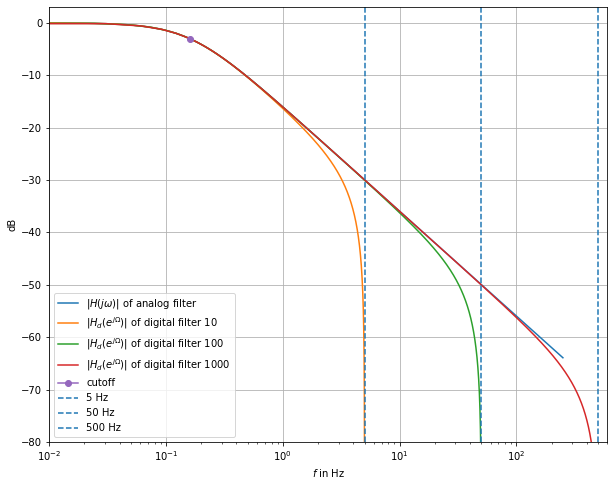

In [90]:
plt.figure(figsize=(10, 8))
Om, fs10_Hd   = sig.freqz(fs10_b  , fs10_a, worN=1024)
f10 = Om * fs10 / (2 * np.pi)

Om, fs100_Hd  = sig.freqz(fs100_b , fs100_a, worN=2048)
f100 = Om * fs100 / (2 * np.pi)

Om, fs1000_Hd = sig.freqz(fs1000_b, fs1000_a, worN=16384) # 1000 Hz mesti lebih banyak sampelnya
f1000 = Om * fs1000 / (2 * np.pi)

tmp, H = sig.freqs(B, A, worN=f1000 * Om)
f = Om * f1000 / (2 * np.pi)

plt.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog filter")
plt.semilogx(f10, 20 * np.log10(np.abs(fs10_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 10")
plt.semilogx(f100, 20 * np.log10(np.abs(fs100_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 100")
plt.semilogx(f1000, 20 * np.log10(np.abs(fs1000_Hd)), label=r"$|H_d(e^{j \Omega})|$ of digital filter 1000")
plt.semilogx(0.159, 20 * np.log10(0.707), marker='o',label="cutoff")
plt.axvline(x = 10/2,   linestyle="--", label = '5 Hz')
plt.axvline(x = 100/2,  linestyle="--", label = '50 Hz')
plt.axvline(x = 1000/2, linestyle="--", label = '500 Hz')
plt.xlabel(r"$f$ in Hz")
plt.ylabel(r"dB")
plt.axis([0.01, 600, -80, 3])
plt.legend()
plt.grid()

# https://www.geeksforgeeks.org/plot-a-vertical-line-in-matplotlib/

In [28]:
Om

array([0.00000000e+00, 3.06796158e-03, 6.13592315e-03, ...,
       3.13238877e+00, 3.13545673e+00, 3.13852469e+00])

In [30]:
len(Om)

1024

In [64]:
fs1000_Hd

array([1.00000000e+00+0.00000000e+00j, 9.60393101e-02-2.94645144e-01j,
       2.58733624e-02-1.58757461e-01j, ...,
       5.29454314e-12-2.30098743e-06j, 2.35311184e-12-1.53398560e-06j,
       5.88275160e-13-7.66990996e-07j])

In [62]:
f1000

array([0.00000000e+00, 4.88281250e-01, 9.76562500e-01, ...,
       4.98535156e+02, 4.99023437e+02, 4.99511719e+02])

In [46]:
fs1000_Hd

array([1.00000000e+00+0.00000000e+00j, 9.60393101e-02-2.94645144e-01j,
       2.58733624e-02-1.58757461e-01j, ...,
       5.29454314e-12-2.30098743e-06j, 2.35311184e-12-1.53398560e-06j,
       5.88275160e-13-7.66990996e-07j])

omc  [31415.9265359  37699.11184308]
omcp  [31786.419833   38343.33734981]


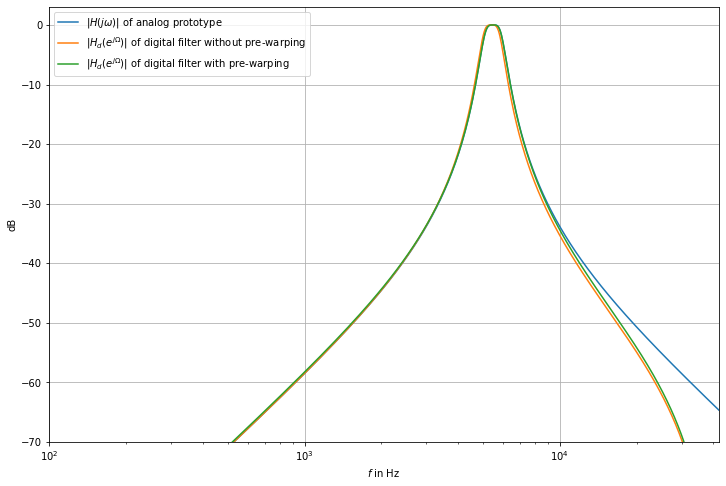

In [96]:
fs = 44100
fs = 84100
omc = 2 * np.pi * np.array([5000, 6000])  # corner frequencies of bandpass
N = 2  # order of filter

# pre-warping of corner frequencies
omcp = 2 * fs * np.tan(omc / (2 * fs))

print("omc ", omc)
print("omcp ", omcp)

# design of analog filters with and without pre-warping
B, A = sig.butter(N, omc, btype="bandpass", analog=True)
Bp, Ap = sig.butter(N, omcp, btype="bandpass", analog=True)

# bilinear transform of analog prototypes
b, a = sig.bilinear(B, A, fs)
bp, ap = sig.bilinear(Bp, Ap, fs)

# compute frequency responses
Om, Hdp = sig.freqz(bp, ap, worN=1024)
Om, Hd = sig.freqz(b, a, worN=1024)
tmp, H = sig.freqs(B, A, worN=fs * Om)

# plot results
np.seterr(divide="ignore")
f = Om * fs / (2 * np.pi)
plt.figure(figsize=(12, 8))
plt.semilogx(f, 20 * np.log10(np.abs(H)), label=r"$|H(j \omega)|$ of analog prototype")
plt.semilogx(
    f,
    20 * np.log10(np.abs(Hd)),
    label=r"$|H_d(e^{j \Omega})|$ of digital filter without pre-warping",
)
plt.semilogx(
    f,
    20 * np.log10(np.abs(Hdp)),
    label=r"$|H_d(e^{j \Omega})|$ of digital filter with pre-warping",
)
plt.xlabel(r"$f$ in Hz")
plt.ylabel(r"dB")
plt.axis([100, fs / 2, -70, 3])
plt.legend()
plt.grid()

In [ ]:
# simulasi sistem kendali dengan bilinear transform